In [71]:
from scipy.io import loadmat
import sys
data = loadmat('Brain.mat')
T1 = data['T1']
labels = data['label']
print(T1.shape)
print(labels.shape)

(362, 434, 10)
(362, 434, 10)


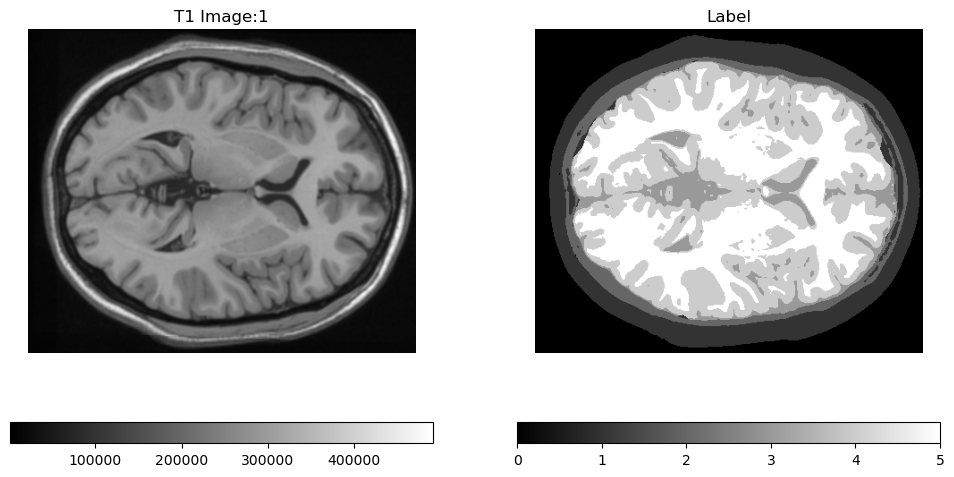

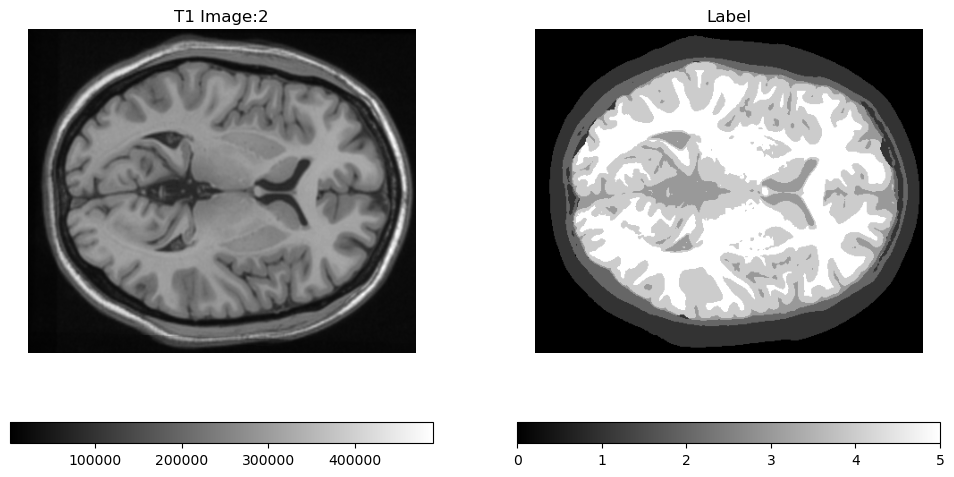

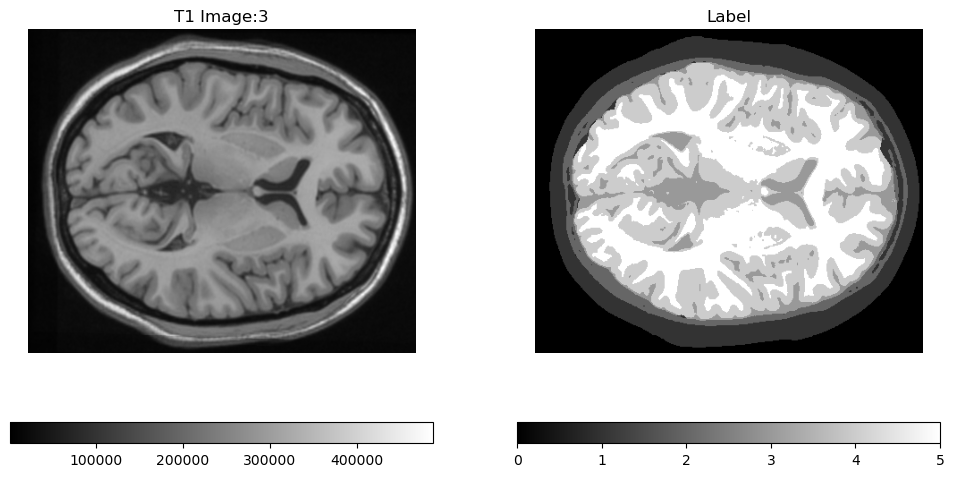

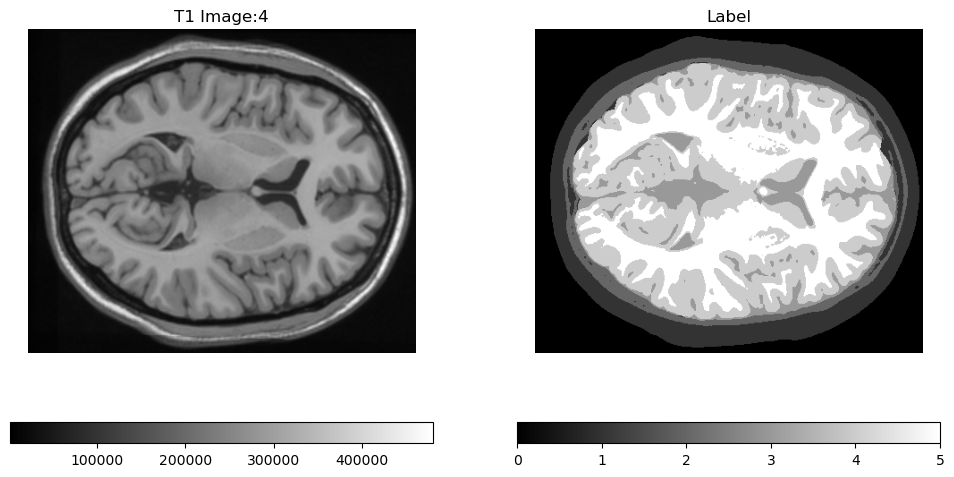

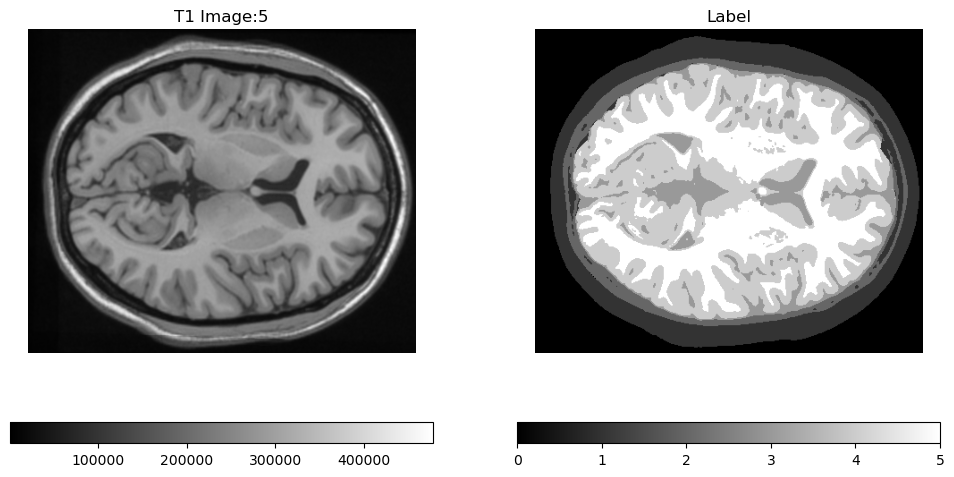

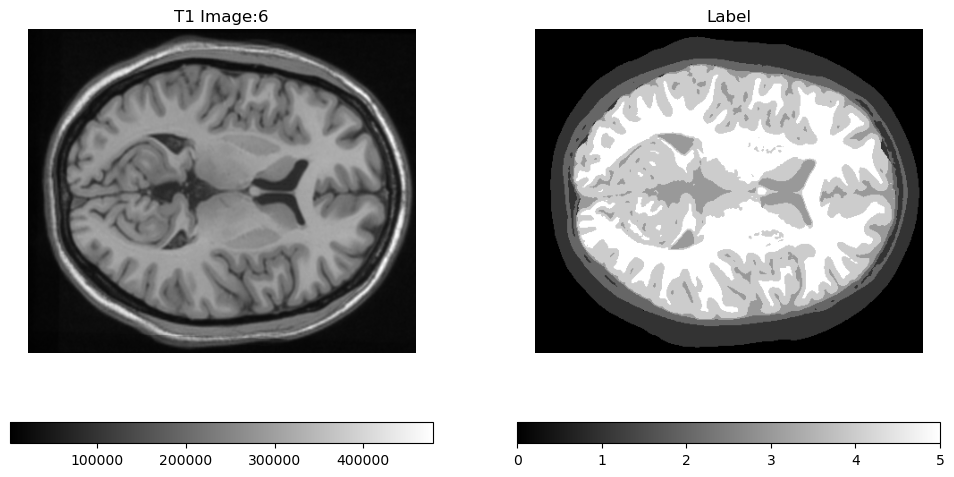

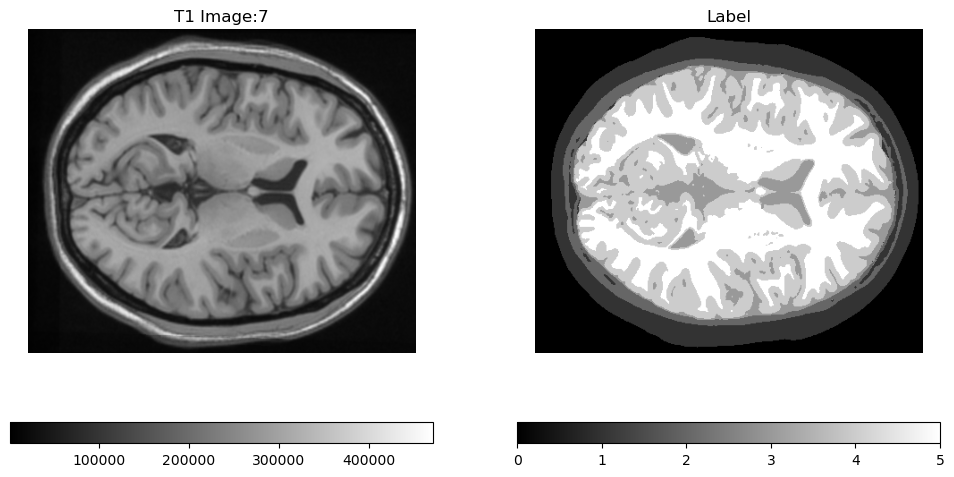

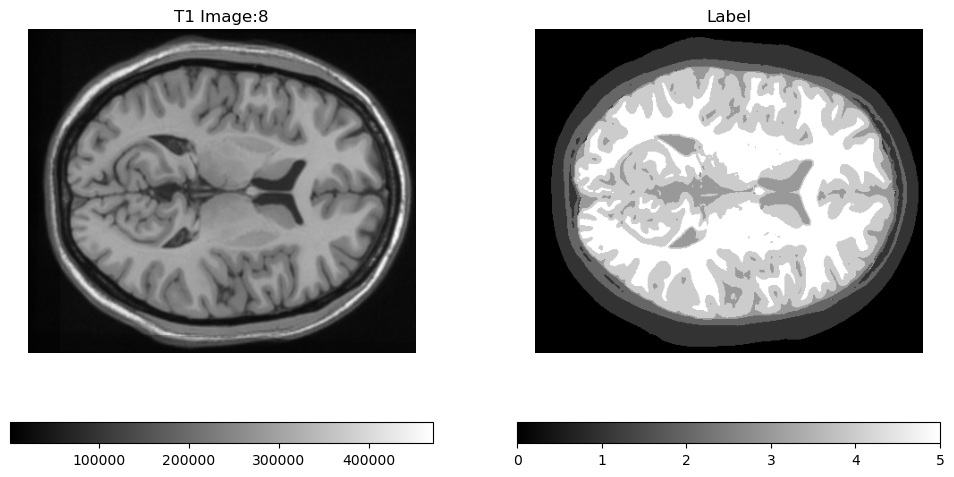

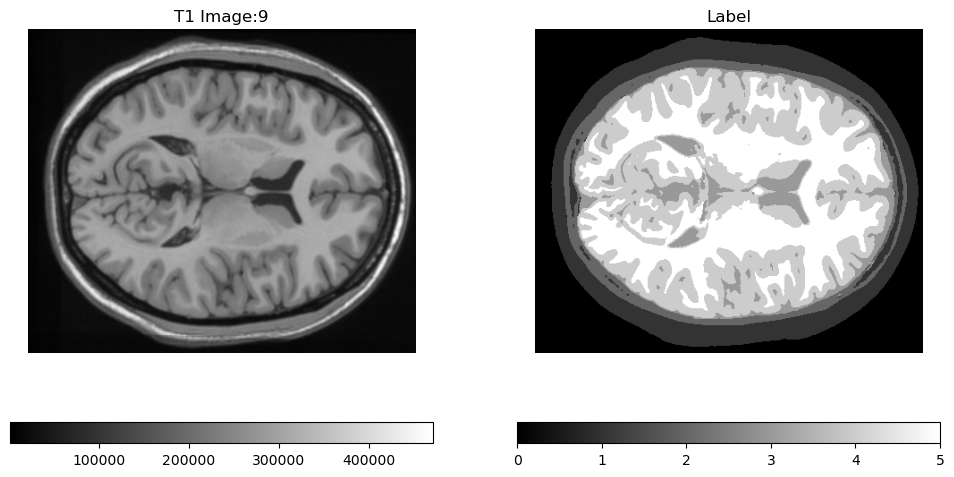

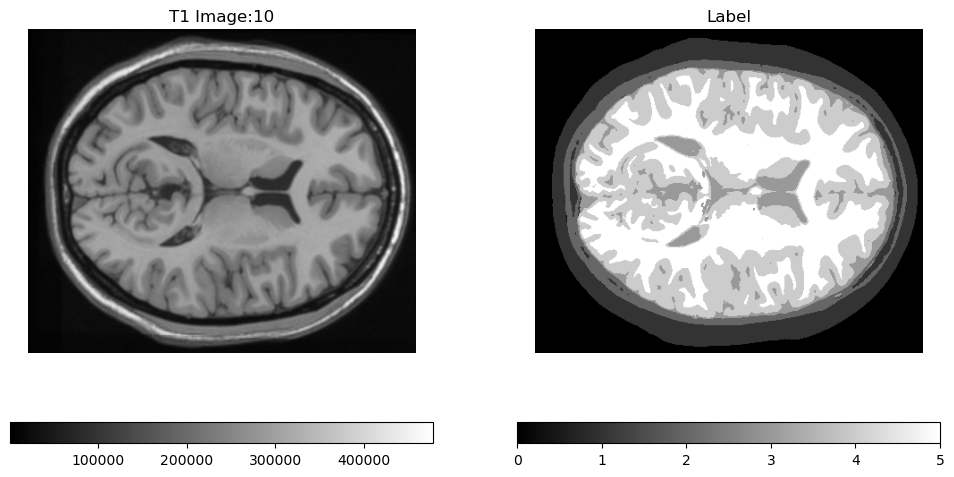

In [68]:
import matplotlib.pyplot as plt

for slice_index in range(T1.shape[2]):
    # 绘制T1图像和对应的label
    fig, axes = plt.subplots(1, 2, figsize=(12, 6))
    t1_image = axes[0].imshow(T1[:, :, slice_index], cmap='gray')
    axes[0].set_title('T1 Image:' + str(slice_index + 1))
    fig.colorbar(t1_image, ax=axes[0], orientation='horizontal')
    label_image = axes[1].imshow(labels[:, :, slice_index], cmap='gray')
    axes[1].set_title('Label')
    fig.colorbar(label_image, ax=axes[1], orientation='horizontal')
    # 隐藏坐标轴
    for ax in axes:
        ax.axis('off')

plt.show()

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


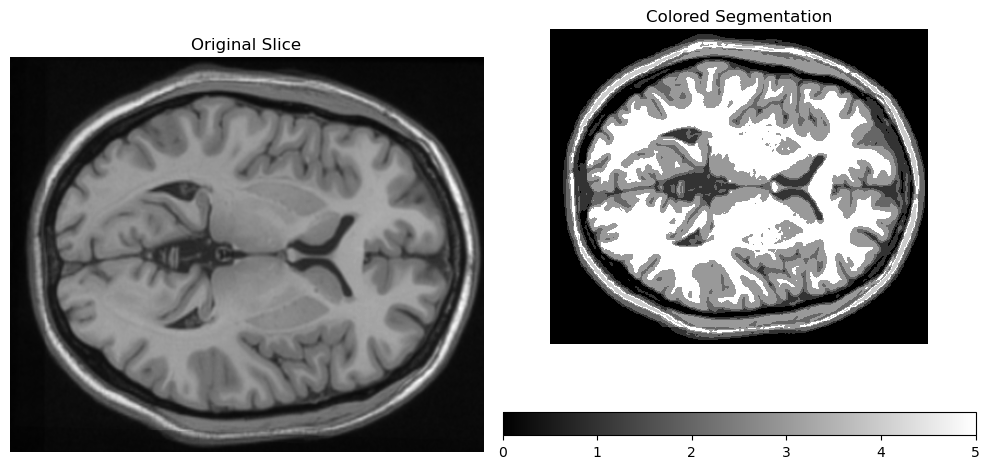

In [67]:
from matplotlib.colors import ListedColormap
import numpy as np
import matplotlib.pyplot as plt
from skimage.filters import threshold_multiotsu

# 假设 'slice_to_segment' 是我们需要分割的MRI切片
slice_to_segment = T1[:,:,0]
# 使用多类Otsu方法确定多个阈值
# 这里的类别数量需要根据实际情况调整
thresholds = threshold_multiotsu(slice_to_segment, classes=6)

# 通过阈值生成分割结果
regions = np.digitize(slice_to_segment, bins=thresholds, right=True)
print(regions)
# 分配颜色
colored_segmentation = np.zeros((*regions.shape, 3), dtype=np.uint8)
for i, color in enumerate([(0, 0, 255), (0, 255, 0), (255, 0, 0), (255, 255, 0), (255, 0, 255), (255, 255, 255)]):
    colored_segmentation[regions == i] = color

# 展示原始切片与分割结果
fig, axes = plt.subplots(1, 2, figsize=(10, 5))
axes[0].imshow(slice_to_segment, cmap='gray')
axes[0].set_title('Original Slice')

# t1_image = axes[1].imshow(colored_segmentation)
color_mapping = np.array([0,1,2,3,5,4])
new_regions = color_mapping[regions]
t1_image = axes[1].imshow(new_regions, cmap='jet', interpolation='nearest')
axes[1].set_title('Colored Segmentation')
fig.colorbar(t1_image, ax=axes[1], orientation='horizontal')
for ax in axes:
    ax.axis('off')
plt.tight_layout()

# 
# # 为每个区域创建一个颜色映射，此颜色映射应与所需的标签颜色匹配
# cmap = ListedColormap([(0, 0, 1), (0, 1, 0), (1, 0, 0), (1, 1, 0), (1, 0, 1), (1, 1, 1)])
# # 展示原始切片与分割结果
# fig, axes = plt.subplots(1, 2, figsize=(10, 5))
# axes[0].imshow(slice_to_segment, cmap='gray')
# axes[0].set_title('Original Slice')
# 
# # 使用自定义的色彩映射来显示分割图像
# segmentation_image = axes[1].imshow(regions, cmap=cmap)
# axes[1].set_title('Colored Segmentation')
# # 在图像旁边添加一个颜色条
# # 创建颜色条的刻度标签
# bounds = [i for i in range(len(thresholds)+1)]
# cb = plt.colorbar(segmentation_image, boundaries=bounds, ticks=[(b + 0.5) for b in bounds], ax=axes[1])
# cb.ax.set_yticklabels([str(i) for i in range(len(thresholds)+1)])  # 设置颜色条的刻度标签
# for ax in axes:
#     ax.axis('off')
  
  
  
  
#   
# plt.subplot(1, 3, 3)
# plt.imshow(regions, cmap='jet', interpolation='nearest')
# plt.title('Segmented Image')
# plt.colorbar(ticks=range(6))   【0，1，2，3，5，4】


plt.show()

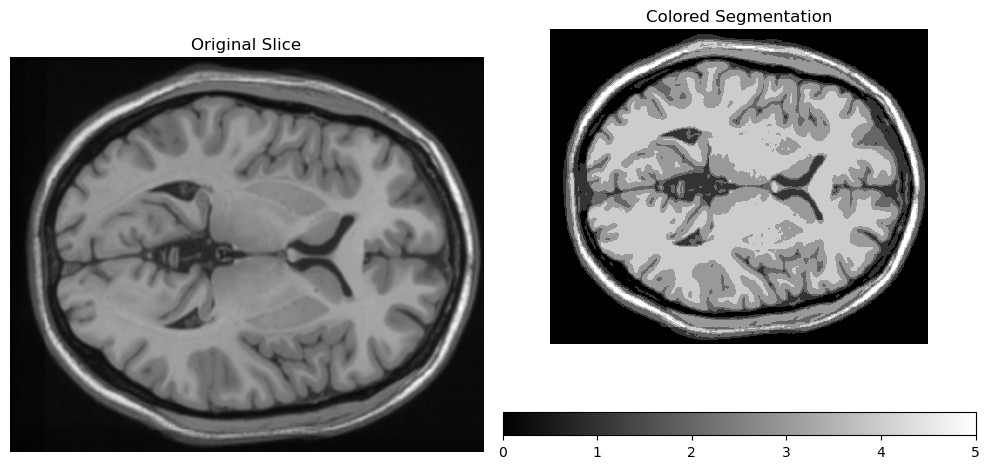

In [66]:
fig, axes = plt.subplots(1, 2, figsize=(10, 5))
axes[0].imshow(slice_to_segment, cmap='gray')
axes[0].set_title('Original Slice')
t1_image = axes[1].imshow(regions, cmap='gray', interpolation='nearest', vmin=0, vmax=5)
axes[1].set_title('Colored Segmentation')
fig.colorbar(t1_image, ax=axes[1], orientation='horizontal')
for ax in axes:
    ax.axis('off')
plt.tight_layout()
plt.show()

In [60]:
print(len(regions))
print(len(thresholds))

362
5


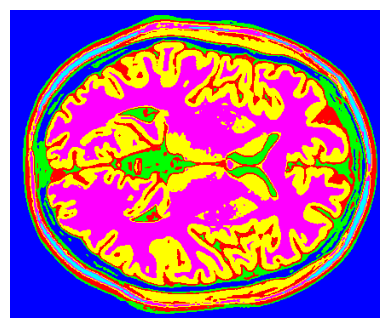

In [6]:
# 应用多阈值Otsu方法
image_gray = T1[:,:,0]
thresholds = threshold_multiotsu(image_gray, classes=6)

# 根据阈值分割图像
regions = np.digitize(image_gray, bins=thresholds)

# 创建分割后的彩色图像
colored_label_image = np.zeros((image_gray.shape[0], image_gray.shape[1], 3), dtype=np.uint8)

# 分配颜色 - 这些颜色需要调整以匹配右侧图像的颜色
colors = [(0, 0, 255), (0, 255, 0), (255, 0, 0), (255, 255, 0), (255, 0, 255), (0, 255, 255)]

for i in range(len(thresholds) + 1):
    colored_label_image[regions == i] = colors[i % len(colors)]

# 显示结果
fig, ax = plt.subplots(figsize=(8, 4))
ax.imshow(colored_label_image)
ax.axis('off')
plt.show()

In [ ]:
# 区域标记


In [65]:
import time
import numpy as np
np.random.seed(42)
a = np.random.uniform(size=(300, 300))
runtimes = 10

timecosts = []
for _ in range(runtimes):
    s_time = time.time()
    for i in range(100):
        a += 1
        np.linalg.svd(a)
    timecosts.append(time.time() - s_time)

print(f'mean of {runtimes} runs: {np.mean(timecosts):.5f}s')


mean of 10 runs: 1.03944s


In [70]:
print(data.keys())

dict_keys(['__header__', '__version__', '__globals__', 'T1', 'label'])
